In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from dotenv import load_dotenv
import os

In [2]:
load_dotenv

<function dotenv.main.load_dotenv(dotenv_path=None, stream=None, verbose=False, override=False, interpolate=True, **kwargs)>

In [3]:
stock_data = Path("C:\\Users\\Zach.000\\Documents\\SMUFinTech\\GitHub\\Portfolio\\project_1\\project_one_assets.csv")
stocks = pd.read_csv(stock_data, index_col='Year')
stocks.head()

,Inflation,US Large Cap,US Mid Cap,US Small Cap,International,Cash,10-year Treasury,Total US Bond Market,REIT,Gold
Year,,,,,,,,,,
1972,0.03,0.19,0.08,0.09,NaN,0.04,0.02,NaN,NaN,0.49
1973,0.09,-0.16,-0.24,-0.33,NaN,0.07,0.03,NaN,NaN,0.73
1974,0.12,-0.27,-0.26,-0.28,NaN,0.08,0.04,NaN,NaN,0.66
1975,0.07,0.37,0.49,0.55,NaN,0.06,0.06,NaN,NaN,-0.25
1976,0.05,0.24,0.37,0.45,NaN,0.05,0.15,NaN,NaN,-0.04


In [4]:
stocks.dtypes


Inflation               float64
US Large Cap            float64
US Mid Cap              float64
US Small Cap            float64
International           float64
Cash                    float64
10-year Treasury        float64
Total US Bond Market    float64
REIT                    float64
Gold                    float64
dtype: object

In [5]:
stocks.isnull().mean()

Inflation               0.000000
US Large Cap            0.000000
US Mid Cap              0.000000
US Small Cap            0.000000
International           0.285714
Cash                    0.000000
10-year Treasury        0.020408
Total US Bond Market    0.326531
REIT                    0.469388
Gold                    0.020408
dtype: float64

In [6]:
stocks.dropna()

,Inflation,US Large Cap,US Mid Cap,US Small Cap,International,Cash,10-year Treasury,Total US Bond Market,REIT,Gold
Year,,,,,,,,,,
1994,0.03,0.01,-0.02,-0.01,0.10,0.04,-0.07,-0.03,-0.08,-0.02
1995,0.03,0.37,0.33,0.29,0.04,0.06,0.26,0.18,0.12,0.01
1996,0.03,0.23,0.19,0.18,0.05,0.05,0.00,0.04,0.34,-0.05
1997,0.02,0.33,0.26,0.25,-0.01,0.05,0.12,0.09,0.19,-0.21
1998,0.02,0.29,0.10,-0.03,0.16,0.05,0.15,0.09,-0.16,-0.01
1999,0.03,0.21,0.15,0.23,0.30,0.05,-0.08,-0.01,-0.04,0.01
2000,0.03,-0.09,0.18,-0.03,-0.16,0.06,0.17,0.11,0.26,-0.05
2001,0.02,-0.12,-0.01,0.03,-0.20,0.04,0.05,0.08,0.12,0.01
2002,0.02,-0.22,-0.15,-0.20,-0.15,0.02,0.15,0.08,0.04,0.26


In [7]:
stocks.isnull().mean()

Inflation               0.000000
US Large Cap            0.000000
US Mid Cap              0.000000
US Small Cap            0.000000
International           0.285714
Cash                    0.000000
10-year Treasury        0.020408
Total US Bond Market    0.326531
REIT                    0.469388
Gold                    0.020408
dtype: float64

In [8]:
stocks.dropna()

,Inflation,US Large Cap,US Mid Cap,US Small Cap,International,Cash,10-year Treasury,Total US Bond Market,REIT,Gold
Year,,,,,,,,,,
1994,0.03,0.01,-0.02,-0.01,0.10,0.04,-0.07,-0.03,-0.08,-0.02
1995,0.03,0.37,0.33,0.29,0.04,0.06,0.26,0.18,0.12,0.01
1996,0.03,0.23,0.19,0.18,0.05,0.05,0.00,0.04,0.34,-0.05
1997,0.02,0.33,0.26,0.25,-0.01,0.05,0.12,0.09,0.19,-0.21
1998,0.02,0.29,0.10,-0.03,0.16,0.05,0.15,0.09,-0.16,-0.01
1999,0.03,0.21,0.15,0.23,0.30,0.05,-0.08,-0.01,-0.04,0.01
2000,0.03,-0.09,0.18,-0.03,-0.16,0.06,0.17,0.11,0.26,-0.05
2001,0.02,-0.12,-0.01,0.03,-0.20,0.04,0.05,0.08,0.12,0.01
2002,0.02,-0.22,-0.15,-0.20,-0.15,0.02,0.15,0.08,0.04,0.26


In [9]:
stocks_filtered = stocks.iloc[:,[1,2,3,4,5,7]]

In [10]:
stocks_filtered.head()

,US Large Cap,US Mid Cap,US Small Cap,International,Cash,Total US Bond Market
Year,,,,,,
1972,0.19,0.08,0.09,NaN,0.04,NaN
1973,-0.16,-0.24,-0.33,NaN,0.07,NaN
1974,-0.27,-0.26,-0.28,NaN,0.08,NaN
1975,0.37,0.49,0.55,NaN,0.06,NaN
1976,0.24,0.37,0.45,NaN,0.05,NaN


In [11]:
stocks_filtered.isnull()

,US Large Cap,US Mid Cap,US Small Cap,International,Cash,Total US Bond Market
Year,,,,,,
1972,False,False,False,True,False,True
1973,False,False,False,True,False,True
1974,False,False,False,True,False,True
1975,False,False,False,True,False,True
1976,False,False,False,True,False,True
1977,False,False,False,True,False,True
1978,False,False,False,True,False,True
1979,False,False,False,True,False,True
1980,False,False,False,True,False,True


In [12]:
stocks_df = stocks_filtered.fillna(0)
stocks_df

,US Large Cap,US Mid Cap,US Small Cap,International,Cash,Total US Bond Market
Year,,,,,,
1972,0.19,0.08,0.09,0.00,0.04,0.00
1973,-0.16,-0.24,-0.33,0.00,0.07,0.00
1974,-0.27,-0.26,-0.28,0.00,0.08,0.00
1975,0.37,0.49,0.55,0.00,0.06,0.00
1976,0.24,0.37,0.45,0.00,0.05,0.00
1977,-0.08,0.01,0.16,0.00,0.05,0.00
1978,0.06,0.09,0.18,0.00,0.07,0.00
1979,0.18,0.31,0.41,0.00,0.10,0.00
1980,0.32,0.31,0.36,0.00,0.12,0.00


In [13]:
stocks_df1=stocks_df[14:]
stocks_df1

,US Large Cap,US Mid Cap,US Small Cap,International,Cash,Total US Bond Market
Year,,,,,,
1986,0.18,0.17,0.10,0.63,0.06,0.00
1987,0.05,0.01,-0.06,0.30,0.06,0.02
1988,0.16,0.19,0.24,0.26,0.07,0.07
1989,0.31,0.26,0.19,0.13,0.09,0.14
1990,-0.03,-0.11,-0.18,-0.25,0.08,0.09
1991,0.30,0.40,0.45,0.09,0.06,0.15
1992,0.07,0.15,0.18,-0.15,0.04,0.07
1993,0.10,0.16,0.19,0.30,0.03,0.10
1994,0.01,-0.02,-0.01,0.10,0.04,-0.03


In [14]:
stocks_correlation=stocks_df1.corr()
stocks_correlation

,US Large Cap,US Mid Cap,US Small Cap,International,Cash,Total US Bond Market
US Large Cap,1.000000,0.886956,0.844771,0.645996,0.134355,0.216020
US Mid Cap,0.886956,1.000000,0.940914,0.628745,0.061410,0.281881
US Small Cap,0.844771,0.940914,1.000000,0.611911,-0.036770,0.182059
International,0.645996,0.628745,0.611911,1.000000,0.074281,-0.199106
Cash,0.134355,0.061410,-0.036770,0.074281,1.000000,0.432320
Total US Bond Market,0.216020,0.281881,0.182059,-0.199106,0.432320,1.000000


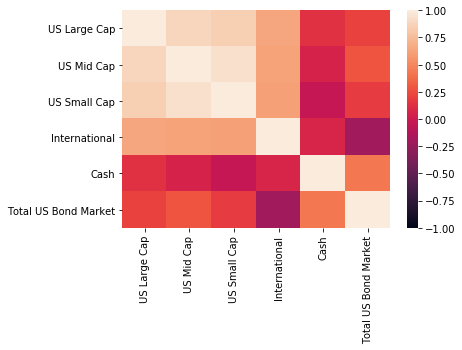

In [15]:
sns.heatmap(stocks_correlation, vmin=-1, vmax=1)

In [16]:
weights = [0.57,0.06, 0.07, 0.25,.05,0]
portfolio_returns_100 = stocks_df1.dot(weights)
portfolio_returns_100.head()

Year
1986    0.2803
1987    0.1029
1988    0.1879
1989    0.2426
1990   -0.0948
dtype: float64

In [17]:
cumulative_returns_100 = (1 + portfolio_returns_100).cumprod()
cumulative_returns_100.head()

Year
1986    1.280300
1987    1.412043
1988    1.677366
1989    2.084295
1990    1.886704
dtype: float64

In [18]:
initial_investment = 10000
cumulative_profit_100 = initial_investment * cumulative_returns_100
cumulative_profit_100.hvplot(label="Cumulative Returns")

:Curve   [Year]   (0)

In [19]:
weights = [0.46,0.05, 0.06, 0.25,.05,0.13]
portfolio_returns_85 = stocks_df1.dot(weights)
portfolio_returns_85.head()

Year
1986    0.2578
1987    0.1005
1988    0.1751
1989    0.2222
1990   -0.0769
dtype: float64

In [20]:
cumulative_returns_85 = (1 + portfolio_returns_85).cumprod()
cumulative_returns_85.head()


Year
1986    1.257800
1987    1.384209
1988    1.626584
1989    1.988011
1990    1.835133
dtype: float64

In [21]:
initial_investment = 10000
cumulative_profit_85 = (initial_investment * cumulative_returns_85)
cumulative_profit_85.hvplot(label="Cumulative Returns")

:Curve   [Year]   (0)

In [22]:
weights = [.35, 0.03, 0.04,0.18, 0.05,0.35]
portfolio_returns_60 = stocks_df1.dot(weights)
portfolio_returns_60.head()

Year
1986    0.1885
1987    0.0794
1988    0.1461
1989    0.2008
1990   -0.0305
dtype: float64

In [23]:
cumulative_returns_60 = (1 + portfolio_returns_60).cumprod()
cumulative_returns_85.head()


Year
1986    1.257800
1987    1.384209
1988    1.626584
1989    1.988011
1990    1.835133
dtype: float64

In [24]:

initial_investment = 10000
cumulative_profit_60 = initial_investment * cumulative_returns_60
cumulative_profit_60.hvplot(label="Cumulative Returns")

:Curve   [Year]   (0)

In [25]:
# Calculate the mean Risk_Free Rate 
risk_free_rate = stocks['10-year Treasury']
risk_free_rate

Year
1972    0.02
1973    0.03
1974    0.04
1975    0.06
1976    0.15
1977    0.01
1978   -0.01
1979    0.02
1980   -0.01
1981    0.05
1982    0.40
1983    0.02
1984    0.15
1985    0.30
1986    0.21
1987   -0.03
1988    0.07
1989    0.18
1990    0.08
1991    0.19
1992    0.07
1993    0.13
1994   -0.07
1995    0.26
1996    0.00
1997    0.12
1998    0.15
1999   -0.08
2000    0.17
2001    0.05
2002    0.15
2003    0.00
2004    0.05
2005    0.03
2006    0.02
2007    0.10
2008    0.21
2009   -0.10
2010    0.08
2011    0.16
2012    0.03
2013   -0.09
2014    0.11
2015    0.01
2016    0.01
2017    0.02
2018    0.01
2019    0.08
2020     NaN
Name: 10-year Treasury, dtype: float64

In [26]:
#Calculating the risk free rate from 1986 forward because the Bond Index was npot avai;able until 1986
risk_free_rate_adjusted = risk_free_rate.iloc[14:]
risk_free_rate_adjusted.mean()

0.06999999999999998

In [27]:

# Caluculate the annualized standard deviation of returns. Returns are already copmepleted by Year, so no annualization is needed

In [28]:
sharpe_ratios_100 = (portfolio_returns_100 - risk_free_rate_adjusted) / (portfolio_returns_100.std())
sharpe_100 = sharpe_ratios_100.mean()
print (f'The sharpe ratio for a 100% Equity portfolio is    {sharpe_100}')

The sharpe ratio for a 100% Equity portfolio is    0.25366466269281995


In [29]:
sharpe_ratios_85 = (portfolio_returns_85 - risk_free_rate_adjusted) / (portfolio_returns_85.std())
sharpe_85 = sharpe_ratios_85.mean()
print (f'The sharpe ratio for a 85% Equity portfolio is    {sharpe_85}')

The sharpe ratio for a 85% Equity portfolio is    0.2305233270503429


In [30]:
sharpe_ratios_60 = (portfolio_returns_60 - risk_free_rate_adjusted) / (portfolio_returns_60.std())
sharpe_60 = sharpe_ratios_60.mean()
print (f'The sharpe ratio for a 60% Equity portfolio is    {sharpe_60}')

The sharpe ratio for a 60% Equity portfolio is    0.1901398067913847


In [32]:
avg_cumulative_return_100=cumulative_returns_100.mean()
std_cumulative_return_100=cumulative_returns_100.std()
last_cumulative_return_100=cumulative_returns_100.iloc[-1]
last_cumulative_return_100

21.94019519995787

In [48]:
number_simulations = 500
number_records = 35 
monte_carlo = pd.DataFrame()

In [70]:
simulated_pct_df = pd.DataFrame()
portfolio_cumulative_pcts = pd.DataFrame()

for n in range(number_simulations):
    
    
    
    simulated_cumulative_returns_100 = [last_cumulative_return_100]
    

    
    for i in range(number_records):
            
        simulated_cumulative_return_100 = simulated_cumulative_returns_100[-1] * (1 + np.random.normal(avg_cumulative_return_100, std_cumulative_return_100))
        
        simulated_cumulative_returns_100.append(simulated_cumulative_return_100)
        
        
    simulated_pct_df["Cumulative Return"] = pd.Series(simulated_cumulative_returns_100)
    
    simulated_pct_returns=simulated_pct_df.pct_change()
    
    
    weights = [1.0]
    
    
    portfolio_pct_returns = simulated_pct_returns.dot(weights)
    
    
    portfolio_cumulative_pcts[n] = (1 + portfolio_pct_returns.fillna(0))

In [71]:
portfolio_cumulative_pcts.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,6.763554,16.593575,5.955537,14.301122,8.364211,19.730361,10.546997,6.152146,7.633855,14.000914,...,11.002742,11.540941,14.093729,14.060183,10.311789,2.571986,11.328843,11.322080,6.296024,22.682160
2,10.548038,8.721378,3.981895,18.976417,7.798855,13.582678,17.599210,5.016772,6.426512,5.656533,...,12.602997,13.263456,6.511309,8.885197,4.695908,19.658270,15.240073,6.144710,0.621539,4.174297
3,10.740049,13.729902,17.238215,5.829268,12.302653,14.642212,16.556506,19.927460,0.796251,11.736910,...,11.147584,9.971002,8.360838,17.416447,5.984955,10.110460,4.597074,14.772486,9.895442,5.731100
4,16.335042,0.794954,1.291095,2.875939,7.535740,10.647426,-8.018546,5.407941,6.940588,14.423989,...,9.973037,3.516068,10.312949,11.572600,0.794439,0.852024,19.662867,16.071820,10.440536,7.844834


<Figure size 432x288 with 0 Axes>

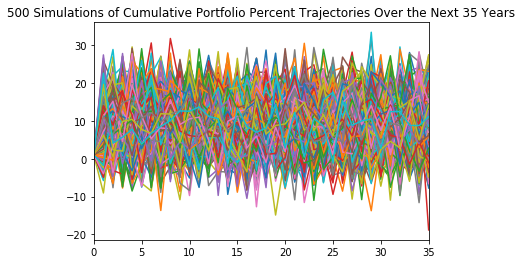

In [72]:
fig=plt.figure();
plot_title = f"{n+1} Simulations of Cumulative Portfolio Percent Trajectories Over the Next 35 Years"
portfolio_cumulative_pcts.plot(legend=None, title=plot_title)

In [73]:
avg_cumulative_return_85=cumulative_returns_85.mean()
std_cumulative_return_85=cumulative_returns_85.std()
last_cumulative_return_85=cumulative_returns_85.iloc[-1]
last_cumulative_return_85

18.853952025414916

In [74]:
number_simulations = 500
number_records = 35 
monte_carlo = pd.DataFrame()

In [76]:
simulated_pct_df_85 = pd.DataFrame()
portfolio_cumulative_pcts_85 = pd.DataFrame()

for n in range(number_simulations):
    
    
    
    simulated_cumulative_returns_85 = [last_cumulative_return_85]
    

    
    for i in range(number_records):
            
        simulated_cumulative_return_85 = simulated_cumulative_returns_85[-1] * (1 + np.random.normal(avg_cumulative_return_85, std_cumulative_return_85))
        
        simulated_cumulative_returns_85.append(simulated_cumulative_return_85)
        
        
    simulated_pct_df_85["Cumulative Return"] = pd.Series(simulated_cumulative_returns_85)
    
    simulated_pct_returns_85=simulated_pct_df_85.pct_change()
    
    
    weights = [1.0]
    
    
    portfolio_pct_returns_85 = simulated_pct_returns_85.dot(weights)
    
    
    portfolio_cumulative_pcts_85[n] = (1 + portfolio_pct_returns_85.fillna(0))

In [77]:
portfolio_cumulative_pcts_85.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,14.828943,11.467618,8.278875,7.627275,21.031372,14.541778,13.305960,1.461531,3.779895,5.252673,...,1.874660,5.283934,15.087876,24.671114,4.225493,10.689769,14.522842,12.406450,3.179158,10.487368
2,0.646709,8.998460,8.055213,7.233132,-4.910975,5.079299,5.311697,10.384026,10.346851,5.929314,...,25.319718,13.749489,18.399977,13.178720,7.238472,9.904179,9.729970,9.605891,12.607284,11.492079
3,4.627039,11.522865,3.250626,5.129506,0.896132,16.712764,7.477255,10.455424,9.216016,10.787026,...,8.687875,17.388633,9.549886,7.526015,-0.613558,3.776215,19.889264,8.751326,-1.130009,5.192415
4,12.517043,5.976664,11.417414,24.816531,-1.119750,9.493007,8.334813,8.106859,4.593227,8.748990,...,11.449724,0.515660,10.741237,7.385509,4.277445,13.769165,1.545052,5.861776,4.818401,20.119538


<Figure size 432x288 with 0 Axes>

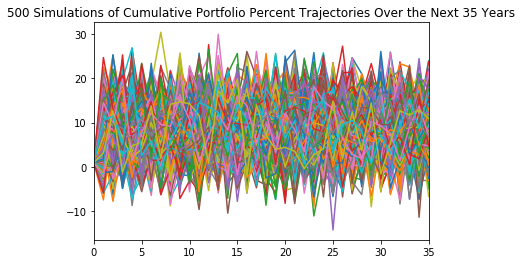

In [78]:
fig=plt.figure();
plot_title = f"{n+1} Simulations of Cumulative Portfolio Percent Trajectories Over the Next 35 Years"
portfolio_cumulative_pcts_85.plot(legend=None, title=plot_title)

In [79]:
avg_cumulative_return_60=cumulative_returns_60.mean()
std_cumulative_return_60=cumulative_returns_60.std()
last_cumulative_return_60=cumulative_returns_60.iloc[-1]
last_cumulative_return_60

15.036172088630465

In [80]:
number_simulations = 500
number_records = 35 
monte_carlo = pd.DataFrame()

In [81]:
simulated_pct_df_60 = pd.DataFrame()
portfolio_cumulative_pcts_60 = pd.DataFrame()

for n in range(number_simulations):
    
    
    
    simulated_cumulative_returns_60 = [last_cumulative_return_60]
    

    
    for i in range(number_records):
            
        simulated_cumulative_return_60 = simulated_cumulative_returns_60[-1] * (1 + np.random.normal(avg_cumulative_return_60, std_cumulative_return_60))
        
        simulated_cumulative_returns_60.append(simulated_cumulative_return_60)
        
        
    simulated_pct_df_60["Cumulative Return"] = pd.Series(simulated_cumulative_returns_60)
    
    simulated_pct_returns_60=simulated_pct_df_60.pct_change()
    
    
    weights = [1.0]
    
    
    portfolio_pct_returns_60 = simulated_pct_returns_60.dot(weights)
    
    
    portfolio_cumulative_pcts_60[n] = (1 + portfolio_pct_returns_60.fillna(0))

In [82]:
portfolio_cumulative_pcts_60.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,11.265695,8.250383,10.078771,6.536044,8.007046,11.990763,4.350882,2.830497,4.178909,10.544339,...,9.641876,1.404480,2.633926,-1.030647,7.234620,3.706478,6.475425,13.672719,11.631361,0.779321
2,2.356587,2.752429,4.522484,-0.184134,8.561233,4.565874,3.256759,11.501514,15.425826,8.714460,...,8.441725,1.237032,5.276927,5.059625,13.172595,6.668303,6.316653,11.986472,5.732876,5.309245
3,13.154749,7.321841,18.742703,-1.820904,6.003445,-2.090511,0.256916,11.516071,3.541170,0.370488,...,7.122591,11.209144,6.036954,2.029163,6.555202,6.210200,0.268982,8.859464,6.865364,3.508810
4,11.272087,10.008843,13.577657,10.235480,4.979080,6.301032,12.062168,9.856911,14.748118,4.507208,...,-2.163261,14.331007,11.100517,8.758575,7.477712,1.823263,15.201772,4.990948,6.051143,4.796545


<Figure size 432x288 with 0 Axes>

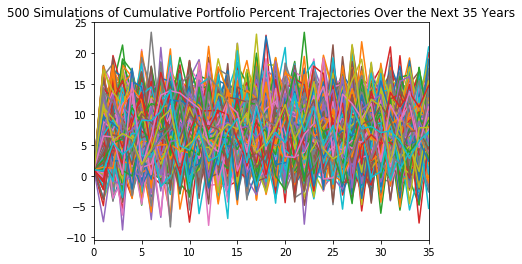

In [83]:
fig=plt.figure();
plot_title = f"{n+1} Simulations of Cumulative Portfolio Percent Trajectories Over the Next 35 Years"
portfolio_cumulative_pcts_60.plot(legend=None, title=plot_title)